<a href="https://colab.research.google.com/github/Skillettonchik/Skillettonchik/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Обнаружение фальшивых новостей

Accuracy: 77.82%


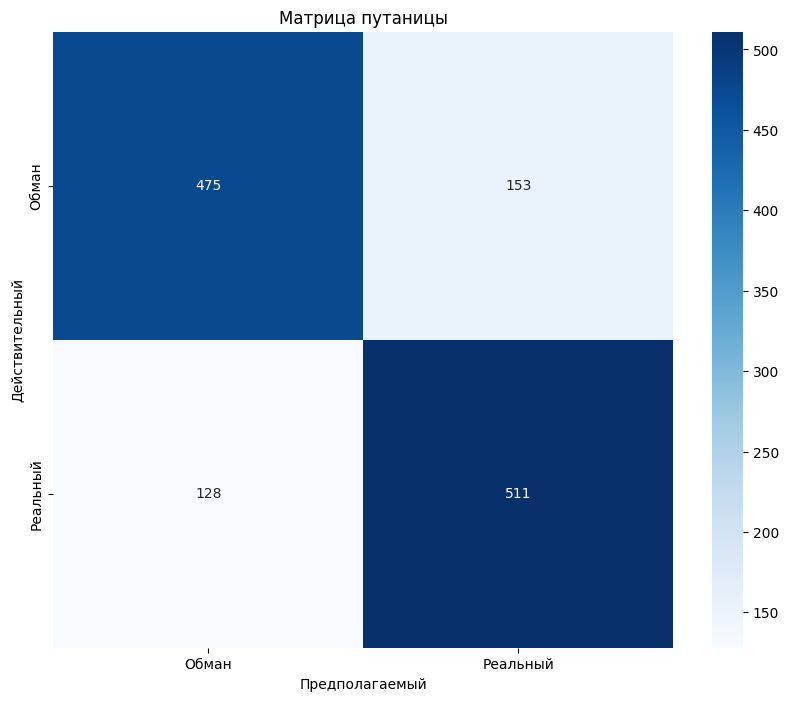

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv')

# Разделение данных на признаки и метки
X = df['title']
y = df['text']
z = df['label']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Преобразование текстовых данных
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Обучение модели
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, z_train)

# Предсказание и оценка модели
z_pred = pac.predict(tfidf_test)
score = accuracy_score(z_test, z_pred)
print(f'Accuracy: {score * 100:.2f}%')

# Отчет о классификации
report = classification_report(z_test, z_pred, target_names=['FAKE', 'REAL'], output_dict=True)
pd.DataFrame(report).transpose().round(4)

# Матрица ошибок
cm = confusion_matrix(z_test, z_pred, labels=['FAKE', 'REAL'])

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Обман', 'Реальный'], yticklabels=['Обман', 'Реальный'])
plt.xlabel('Предполагаемый')
plt.ylabel('Действительный')
plt.title('Матрица путаницы')
plt.show()

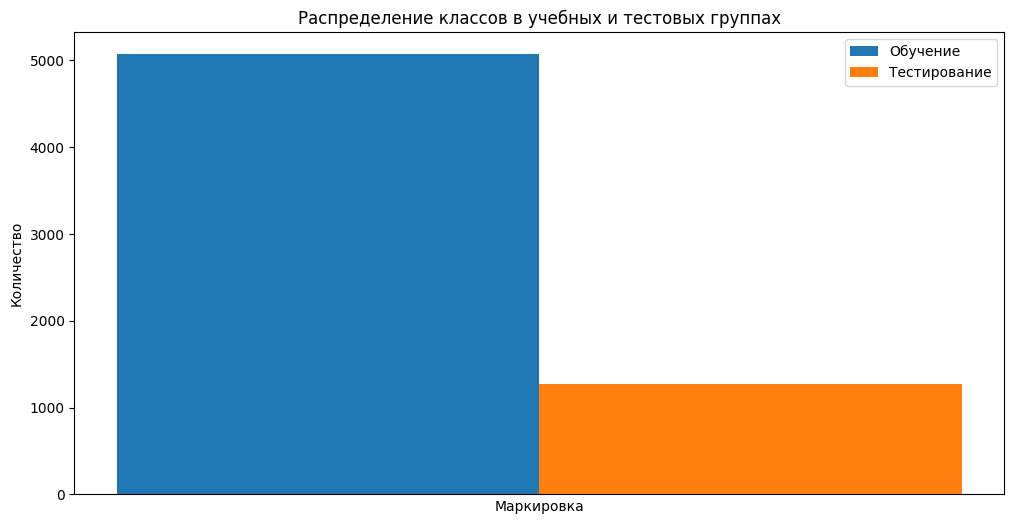

In [ ]:
# Гистограмма распределения классов
plt.figure(figsize=(12, 6))
plt.hist([z_train, z_test], label=['Обучение', 'Тестирование'], bins=[0, 1])
plt.legend(loc='upper right')
plt.title('Распределение классов в учебных и тестовых группах')
plt.xlabel('Маркировка')
plt.ylabel('Количество')
plt.show()

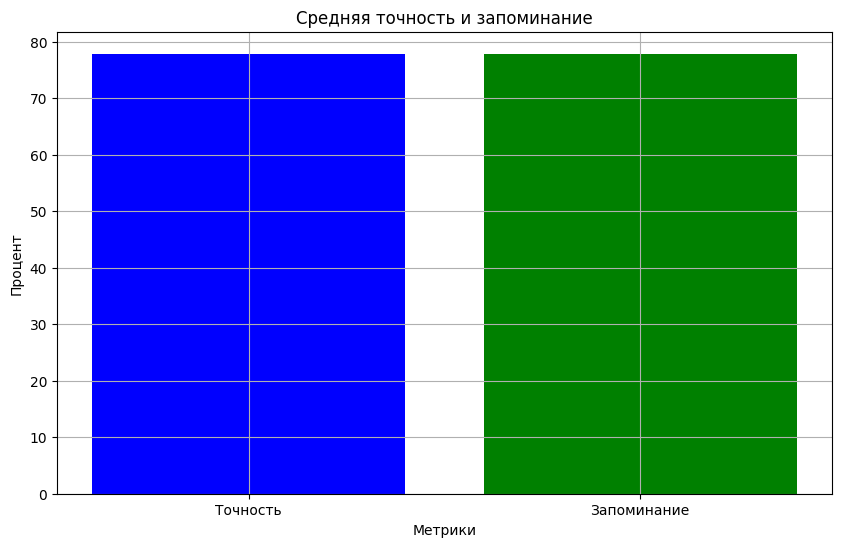

In [ ]:
# График точности и полноты для каждого класса
precision = report['macro avg']['precision'] * 100
recall = report['macro avg']['recall'] * 100
plt.figure(figsize=(10, 6))
plt.bar(['Точность', 'Запоминание'], [precision, recall], color=['blue', 'green'])
plt.title('Средняя точность и запоминание')
plt.xlabel('Метрики')
plt.ylabel('Процент')
plt.grid(True)
plt.show()

# Задача 2. Обнаружение болезни паркинсона с помощью XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


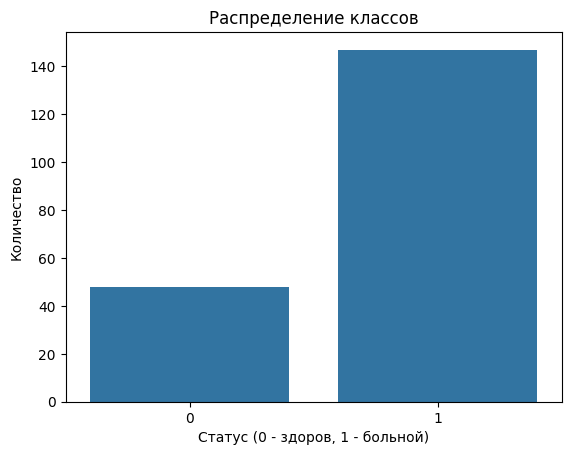

Точность модели на тестовой выборке: 94.87%
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data"
data = pd.read_csv(url)

# Разделение данных на признаки и метки
X = data.drop(columns=['name', 'status'])
y = data['status']

# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определение параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Создание модели XGBoost
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Обучение модели XGBoost с лучшими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Визуализация распределения целевой переменной
sns.countplot(x='status', data=data)
plt.title('Распределение классов')
plt.xlabel('Статус (0 - здоров, 1 - больной)')
plt.ylabel('Количество')
plt.show()

print(f"Точность модели на тестовой выборке: {accuracy * 100:.2f}%")
print(f"Лучшие параметры: {grid_search.best_params_}")

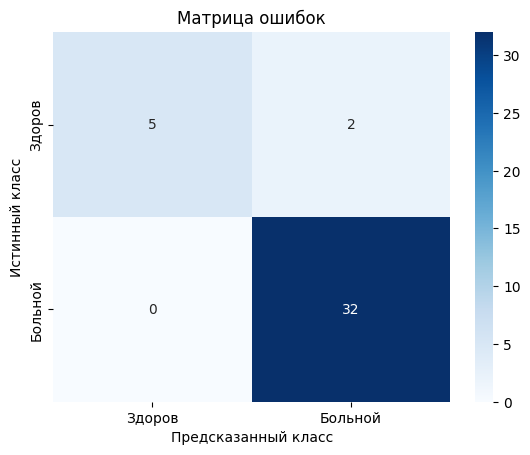

In [ ]:
# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Здоров', 'Больной'], yticklabels=['Здоров', 'Больной'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

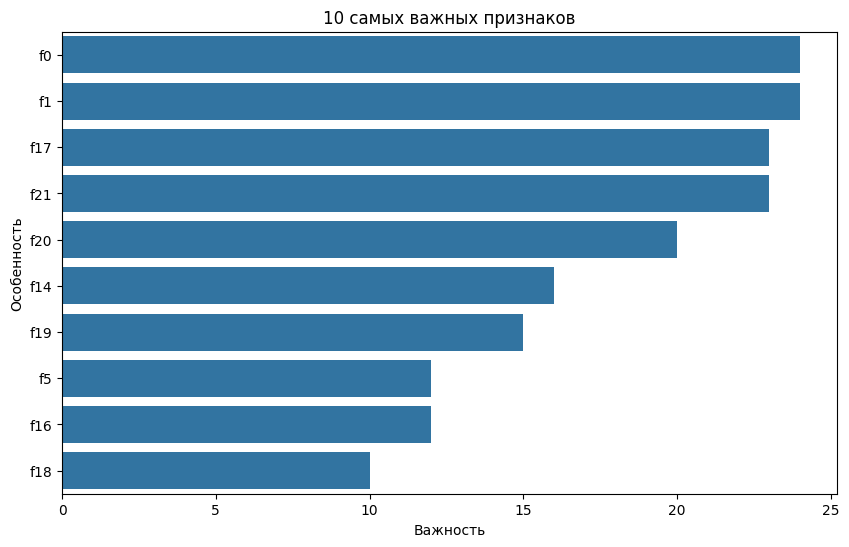

In [ ]:
# Визуализация важности признаков
xgb_importance = best_model.get_booster().get_score(importance_type='weight')
xgb_importance = pd.DataFrame(list(xgb_importance.items()), columns=['Особенность', 'Важность']).sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Особенность', data=xgb_importance.head(10))
plt.title('10 самых важных признаков')
plt.show()

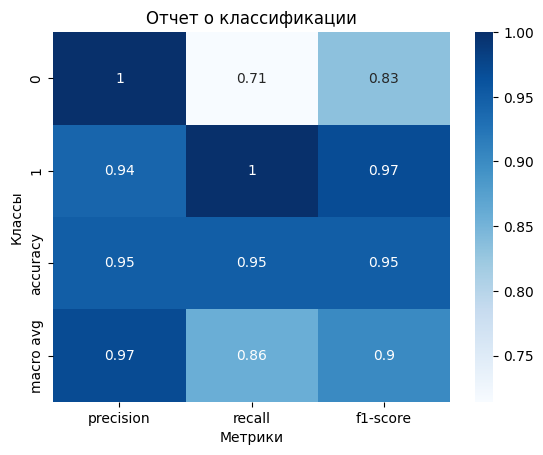

In [ ]:
# Дополнительная визуализация: отчет о классификации
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].iloc[:, :-1], annot=True, cmap='Blues')
plt.title('Отчет о классификации')
plt.xlabel('Метрики')
plt.ylabel('Классы')
plt.show()

# Задача 3. Творческая

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
file_path = '/content/healthcare_dataset.csv'
data = pd.read_csv(file_path)

# Изучение данных
print("Первые пять строк:")
print(data.head())

print("\nИнформация о колонках:")
print(data.info())

print("\nСтатистические данные по числовым колонкам:")
print(data.describe())

# Проверка на пропущенные значения
missing_values = data.isnull().sum()
print("\nПропущенные значения по колонкам:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nЕсть пропущенные значения. Удаляем строки с пропусками.")
    data = data.dropna()
else:
    print("\nНет пропущенных значений.")

# Предварительная обработка данных, если есть пропущенные значения, можно их заполнить или удалить
data = data.dropna()

Первые пять строк:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0 

<ipython-input-91-9d9ba1d41435>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values, palette='viridis')


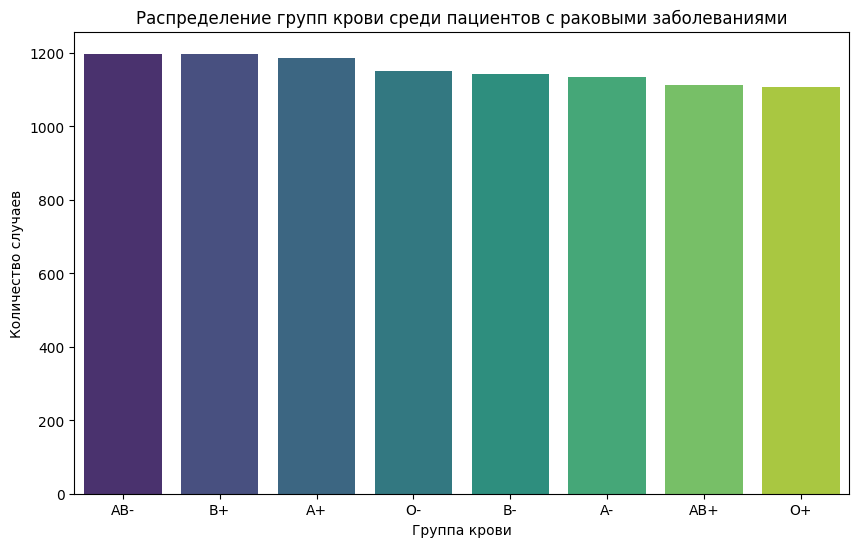

In [ ]:
# Приведение названий столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()

# Приведение значений в столбце 'blood type' к верхнему регистру для унификации
data['blood type'] = data['blood type'].str.upper()

# Фильтрация данных для анализа только случаев с раковыми заболеваниями
cancer_data = data[data['medical condition'].str.lower() == 'cancer']

# Подсчет количества случаев рака для каждой группы крови
blood_type_counts = cancer_data['blood type'].value_counts()

# Подсчет количества различных медицинских условий
condition_counts = data['medical condition'].value_counts()

# Выбор числовых колонок
numeric_columns = data.select_dtypes(include=['number']).columns

# Создание корреляционной матрицы
corr_matrix = data[numeric_columns].corr()

# Визуализация распределения групп крови среди пациентов с раковыми заболеваниями
plt.figure(figsize=(10, 6))
sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values, palette='viridis')
plt.title('Распределение групп крови среди пациентов с раковыми заболеваниями')
plt.xlabel('Группа крови')
plt.ylabel('Количество случаев')
plt.show()

<ipython-input-92-4ea1973b1fc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='rocket')


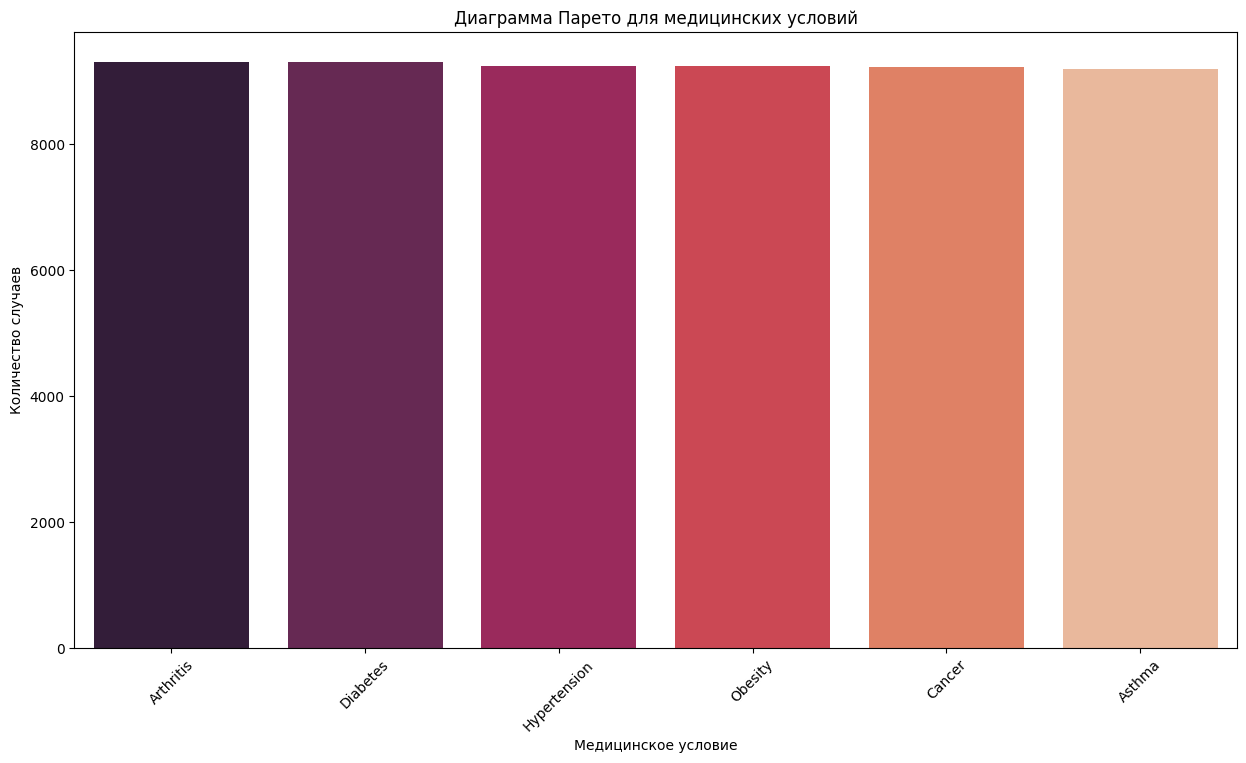

In [ ]:
# Создание диаграммы Парето
plt.figure(figsize=(15, 8))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='rocket')
plt.title('Диаграмма Парето для медицинских условий')
plt.xlabel('Медицинское условие')
plt.ylabel('Количество случаев')
plt.xticks(rotation=45)
plt.show()

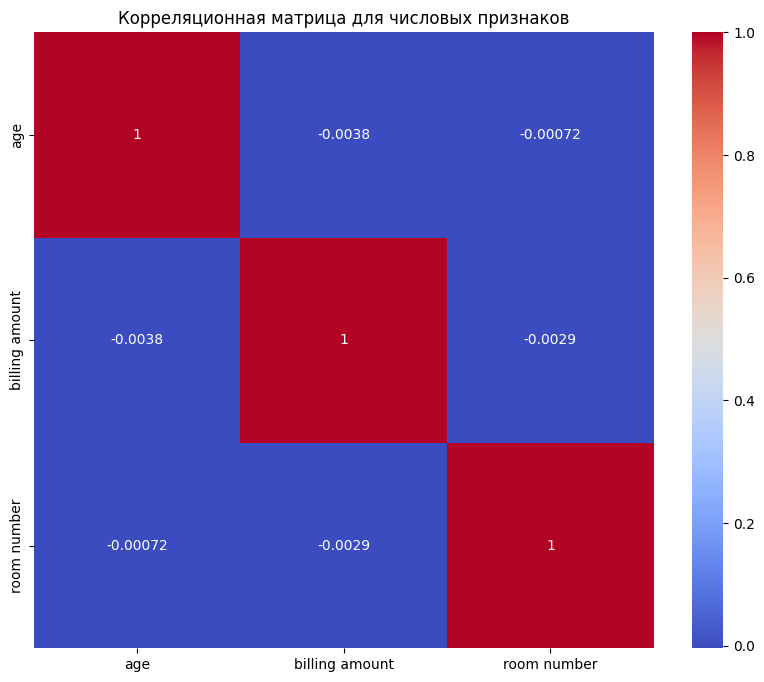

In [ ]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для числовых признаков')
plt.show()

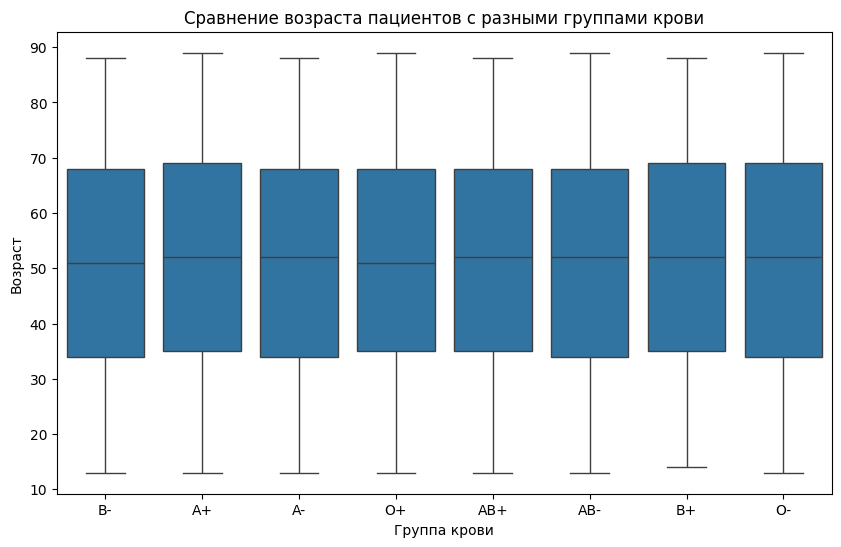

In [ ]:
# Сравнение возраста пациентов с разными группами крови
plt.figure(figsize=(10, 6))
sns.boxplot(x='blood type', y='age', data=data)
plt.title('Сравнение возраста пациентов с разными группами крови')
plt.xlabel('Группа крови')
plt.ylabel('Возраст')
plt.show()

# Анализ данных:

# Исходный набор данных

Начнем с изучения исходного набора данных. Посмотрим на первые строки таблицы, информацию о колонках и статистику по числовым данным.

# Пропущенные значения

Проверяем наличие пропущенных значений и принимаем решение об их обработке.

# Приведение данных к единому формату

Приводим названия колонок к нижнему регистру и значения в колонке blood type к верхнему регистру для унификации.

# Фильтрация данных

Фильтруем данные, чтобы оставить только случаи с раковыми заболеваниями.

# Распределение групп крови среди пациентов с раком

# Дополнительные визуализации

Теперь создадим еще несколько визуализаций для более детального анализа данных.

# Диаграмма Парето для выявления наиболее распространенных медицинских условий

Диаграмма Парето поможет нам определить, какие медицинские условия встречаются чаще всего.

# Корреляционная матрица для числовых признаков

Корреляционная матрица покажет взаимосвязь между различными числовыми признаками.

# Сравнение возраста пациентов с разными группами крови

Создадим boxplot для сравнения возрастов пациентов с разными группами крови.

# Вывод:

Проведенный анализ позволил выявить интересные тенденции и взаимосвязи в данных, касающиеся групп крови и заболеваемости раком. Тем не менее, для получения более точных и обоснованных выводов необходимо провести дополнительные исследования, включающие больший объем данных и использование более сложных методов анализа.